In [0]:
# Title - Prediction of Stock Market Closing Prices and Time Series Analysis using Recurrent Neural Networks with Long-Short Term Memory 
# 1. Sirisha Satish (sxs210095)
# 2. Anish Joshi (axj200101)
# 3. Sandra Jayakumar (sxj210016)
# 4. Sherin Jayakumar (sxj210018)

In [0]:
pip install pandas

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [0]:
github_csv_url1 = "https://raw.githubusercontent.com/sirishasatish/BDA-dataset/main/AAPL.csv"
databricks_target_path1 = "/mnt/my-data/AAPL.csv"
dbutils.fs.cp(github_csv_url1, databricks_target_path1)

github_csv_url2 = "https://raw.githubusercontent.com/sirishasatish/BDA-dataset/main/ABM.csv"
databricks_target_path2 = "/mnt/my-data/ABM.csv"
dbutils.fs.cp(github_csv_url2, databricks_target_path2)

github_csv_url3 = "https://raw.githubusercontent.com/sirishasatish/BDA-dataset/main/ADBE.csv"
databricks_target_path3 = "/mnt/my-data/ADBE.csv"
dbutils.fs.cp(github_csv_url3, databricks_target_path3)

Out[2]: True

In [0]:
df_apple = spark.read.csv(databricks_target_path1, header=True, inferSchema=True)
df_abm = spark.read.csv(databricks_target_path2, header=True, inferSchema=True)
df_adobe = spark.read.csv(databricks_target_path3, header=True, inferSchema=True)

In [0]:
print((df_apple.count(), len(df_apple.columns)))
print((df_abm.count(), len(df_abm.columns)))
print((df_adobe.count(), len(df_adobe.columns)))

(10590, 7)
(10778, 7)
(9158, 7)


In [0]:
df_apple.show()

+----------+-------------------+-------------------+---------+-------------------+-------------------+-------------------+
|      Date|                Low|               Open|   Volume|               High|              Close|     Adjusted Close|
+----------+-------------------+-------------------+---------+-------------------+-------------------+-------------------+
|1980-12-12| 0.1283479928970337| 0.1283479928970337|469033600| 0.1289059966802597| 0.1283479928970337|0.09987381845712662|
|1980-12-15|0.12165199965238571|0.12221000343561172|175884800|0.12221000343561172|0.12165199965238571|0.09466329962015152|
|1980-12-16|0.11272300034761429| 0.1132809966802597|105728000| 0.1132809966802597|0.11272300034761429|0.08771524578332901|
|1980-12-17|0.11551299691200256|0.11551299691200256| 86441600|0.11607100069522858|0.11551299691200256|0.08988628536462784|
|1980-12-18|0.11886200308799744|0.11886200308799744| 73449600|0.11941999942064285|0.11886200308799744|0.09249227494001389|
|1980-12-19|0.12

In [0]:
df_abm.show()

+----------+------------------+------------------+------+------------------+------------------+-------------------+
|      Date|               Low|              Open|Volume|              High|             Close|     Adjusted Close|
+----------+------------------+------------------+------+------------------+------------------+-------------------+
|1980-03-17|0.9333329796791077|               0.0| 19500| 0.949999988079071|0.9333329796791077| 0.3614933490753174|
|1980-03-18|0.9083330035209656|               0.0| 33000|0.9333329796791077|0.9166669845581055| 0.3550385534763336|
|1980-03-19|0.9166669845581055|0.9166669845581055|     0|0.9166669845581055|0.9166669845581055| 0.3550385534763336|
|1980-03-20| 0.925000011920929|               0.0| 30000|0.9333329796791077|0.9333329796791077| 0.3614933490753174|
|1980-03-21|0.9333329796791077|               0.0| 10500|0.9333329796791077|0.9333329796791077| 0.3614933490753174|
|1980-03-24| 0.925000011920929|               0.0| 25500| 0.925000011920

In [0]:
df_adobe.show()

+----------+------------------+----+--------+------------------+------------------+-------------------+
|      Date|               Low|Open|  Volume|              High|             Close|     Adjusted Close|
+----------+------------------+----+--------+------------------+------------------+-------------------+
|1986-08-13|0.2109380066394806| 0.0|18899200|           0.21875|0.2109380066394806| 0.1980571150779724|
|1986-08-14|0.2226559966802597| 0.0| 4160000|0.2304690033197403|0.2226559966802597|0.20905961096286774|
|1986-08-15|           0.21875| 0.0| 4332800|0.2226559966802597|           0.21875|0.20539206266403198|
|1986-08-18|0.2109380066394806| 0.0| 2828800|           0.21875|0.2109380066394806| 0.1980571150779724|
|1986-08-19|0.2148440033197403| 0.0| 2060800|           0.21875|0.2148440033197403| 0.2017245590686798|
|1986-08-20|0.2148440033197403| 0.0|  684800|0.2265630066394806|0.2148440033197403| 0.2017245590686798|
|1986-08-21|0.2226559966802597| 0.0|  883200|          0.234375|

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame

In [0]:
def check_null_values(*dfs):
    """
    Check for null values in one or more DataFrames.
    
    Parameters:
    *dfs: Variable number of PySpark DataFrames
    
    Returns:
    None (prints information about null values)
    """
    for df in dfs:
        
        nullCounts = {col: df.where(df[col].isNull()).count() for col in df.columns}
        
        for col, cnt in nullCounts.items():
            if cnt > 0:
                print(f"Column '{col}' has {cnt} null values.")
        
        if any(nullCounts.values()):
            print("Null values Detected.\n")
        else:
            print("Null values not detected.\n")


In [0]:
check_null_values(df_apple, df_abm, df_adobe)

Null values not detected.

Null values not detected.

Null values not detected.



In [0]:
df_apple.describe().select("summary", "Low", "Open", "Volume", "High", "Close", "Adjusted Close").show()


+-------+-------------------+--------------------+-------------------+--------------------+-------------------+-------------------+
|summary|                Low|                Open|             Volume|                High|              Close|     Adjusted Close|
+-------+-------------------+--------------------+-------------------+--------------------+-------------------+-------------------+
|  count|              10590|               10590|              10590|               10590|              10590|              10590|
|   mean| 16.141083286323067|  16.323966171619208|3.279584418618508E8|  16.509547594889323| 16.332144759563384| 15.660952214379218|
| stddev| 34.495971491759995|   34.90478691031557|3.379549446710809E8|   35.32784396123649|  34.92849043042451|   34.5967958430079|
|    min|0.04910700023174286|0.049665000289678574|                  0|0.049665000289678574|0.04910700023174286|0.03821253776550293|
|    max|  179.1199951171875|   182.6300048828125|         7421640800|  182.

In [0]:
df_abm.describe().select("summary", "Low", "Open", "Volume", "High", "Close", "Adjusted Close").show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               Low|              Open|            Volume|              High|             Close|    Adjusted Close|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|             10778|             10778|             10778|             10778|             10778|             10778|
|   mean|16.091629788132984| 16.10387910139607|174647.80126182965|16.477261922635535| 16.29149755029228|12.839447339419134|
| stddev|12.932308746525614|13.293935335676228|233680.55879295905|13.253782628197682|13.094653785373874|12.730448372477216|
|    min|0.8666669726371765|               0.0|                 0|0.8666669726371765|0.8666669726371765|0.3356725871562958|
|    max|53.130001068115234| 53.84000015258789|           4552500| 55.47999954223633|53.540000915527344| 53.04816436767578|
+-------

In [0]:

df_adobe.describe().select("summary", "Low", "Open", "Volume", "High", "Close", "Adjusted Close").show()

+-------+------------------+------------------+-----------------+-----------------+------------------+-------------------+
|summary|               Low|              Open|           Volume|             High|             Close|     Adjusted Close|
+-------+------------------+------------------+-----------------+-----------------+------------------+-------------------+
|  count|              9158|              9158|             9158|             9158|              9158|               9158|
|   mean|  73.9367934748885| 74.95309007266094|6500025.731600787|75.90716968781044| 74.96459035551959|  74.91567909074521|
| stddev| 130.8540960449761|132.63856859948504|6233510.175718851|134.1970624334182|132.59263991844074| 132.61704185724045|
|    min|0.2070309966802597|               0.0|            44800|          0.21875|0.2070309966802597|0.19438868761062622|
|    max| 678.9099731445312|  696.280029296875|        175513600|699.5399780273438| 688.3699951171875|  688.3699951171875|
+-------+-------

In [0]:
def plot_close_prices(df, title="Title of the Plot", limit=None):
    """
    Plot the 'Open' column over time for a given PySpark DataFrame.

    Parameters:
    - df: PySpark DataFrame containing 'Date' and 'Close' columns.
    - title: Title for the plot (default is "Title of the Plot").
    - limit: Number of rows to limit for plotting (default is None, i.e., no limit).

    Returns:
    None (displays the plot).
    """
    sample_data = df.select("Date", "Close").toPandas()
    plt.plot(sample_data['Date'], sample_data['Close'])
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.title(title)
    plt.show()

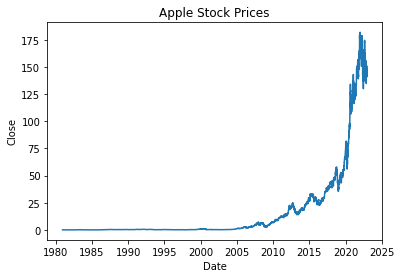

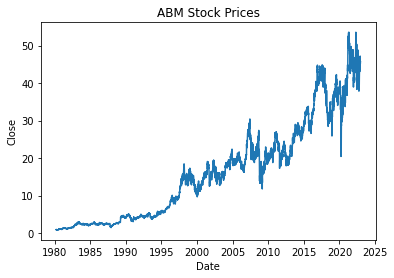

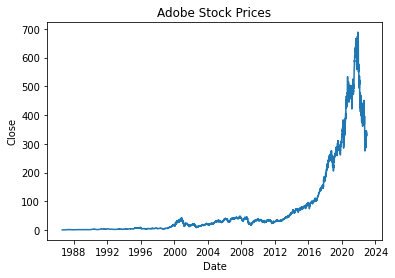

In [0]:
plot_close_prices(df_apple, title="Apple Stock Prices")
plot_close_prices(df_abm, title="ABM Stock Prices")
plot_close_prices(df_adobe, title="Adobe Stock Prices")

In [0]:
from pyspark.sql import functions as F
def plot_open_prices_quarterly_subplots(df, title="Title of the Plot"):
    """
    Plot the quarterly trends of 'Open' prices for a given PySpark DataFrame.

    Parameters:
    - df: PySpark DataFrame containing 'Date' and 'Open' columns.
    - title: Title for the plot (default is "Title of the Plot").

    Returns:
    None (displays the subplots).
    """
    df = df.withColumn("Quarter", F.quarter("Date"))
    df = df.withColumn("Year", F.year("Date"))
    quarterly_data = df.groupBy("Year", "Quarter").agg(F.avg("Close").alias("AvgClose"))
    quarterly_data = quarterly_data.orderBy("Year", "Quarter")
    sample_data = quarterly_data.toPandas()
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=True)
    for quarter in range(1, 5):  
        data_quarter = sample_data[sample_data['Quarter'] == quarter]
        axs[quarter - 1].plot(data_quarter['Year'], data_quarter['AvgClose'])
        axs[quarter - 1].set_title(f'Quarter {quarter}')
        axs[quarter - 1].set_xlabel('Year')
    plt.suptitle(title)
    plt.show()


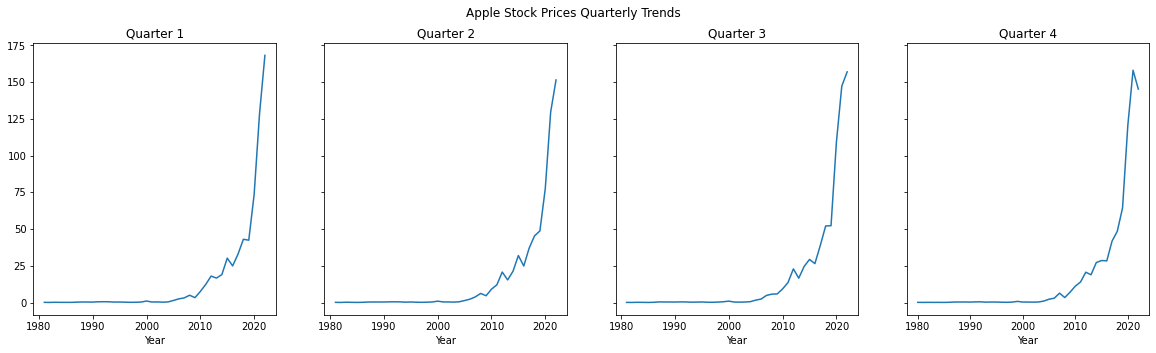

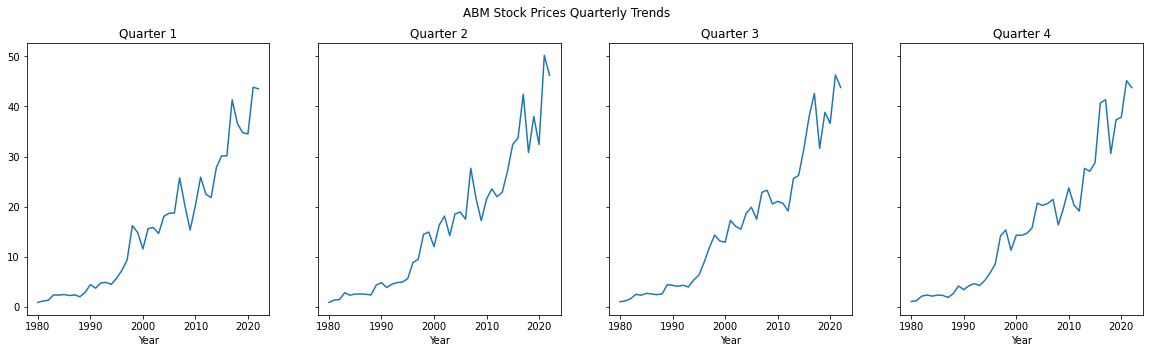

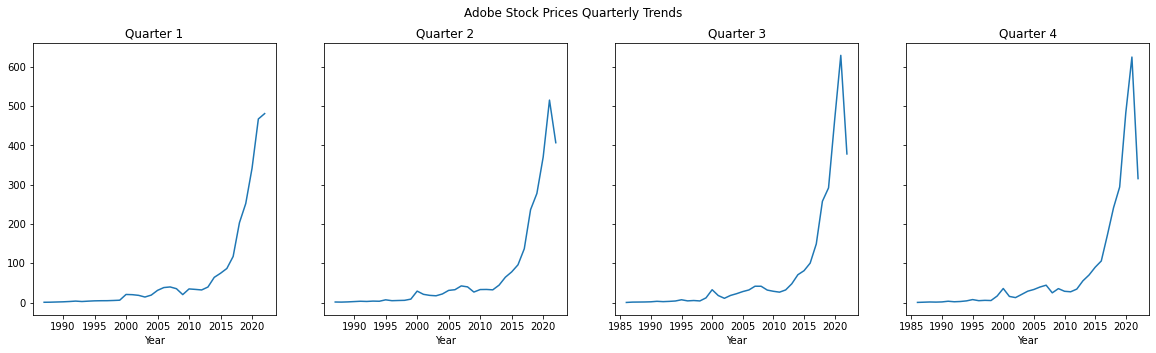

In [0]:
plot_open_prices_quarterly_subplots(df_apple, title="Apple Stock Prices Quarterly Trends")
plot_open_prices_quarterly_subplots(df_abm, title="ABM Stock Prices Quarterly Trends")
plot_open_prices_quarterly_subplots(df_adobe, title="Adobe Stock Prices Quarterly Trends")

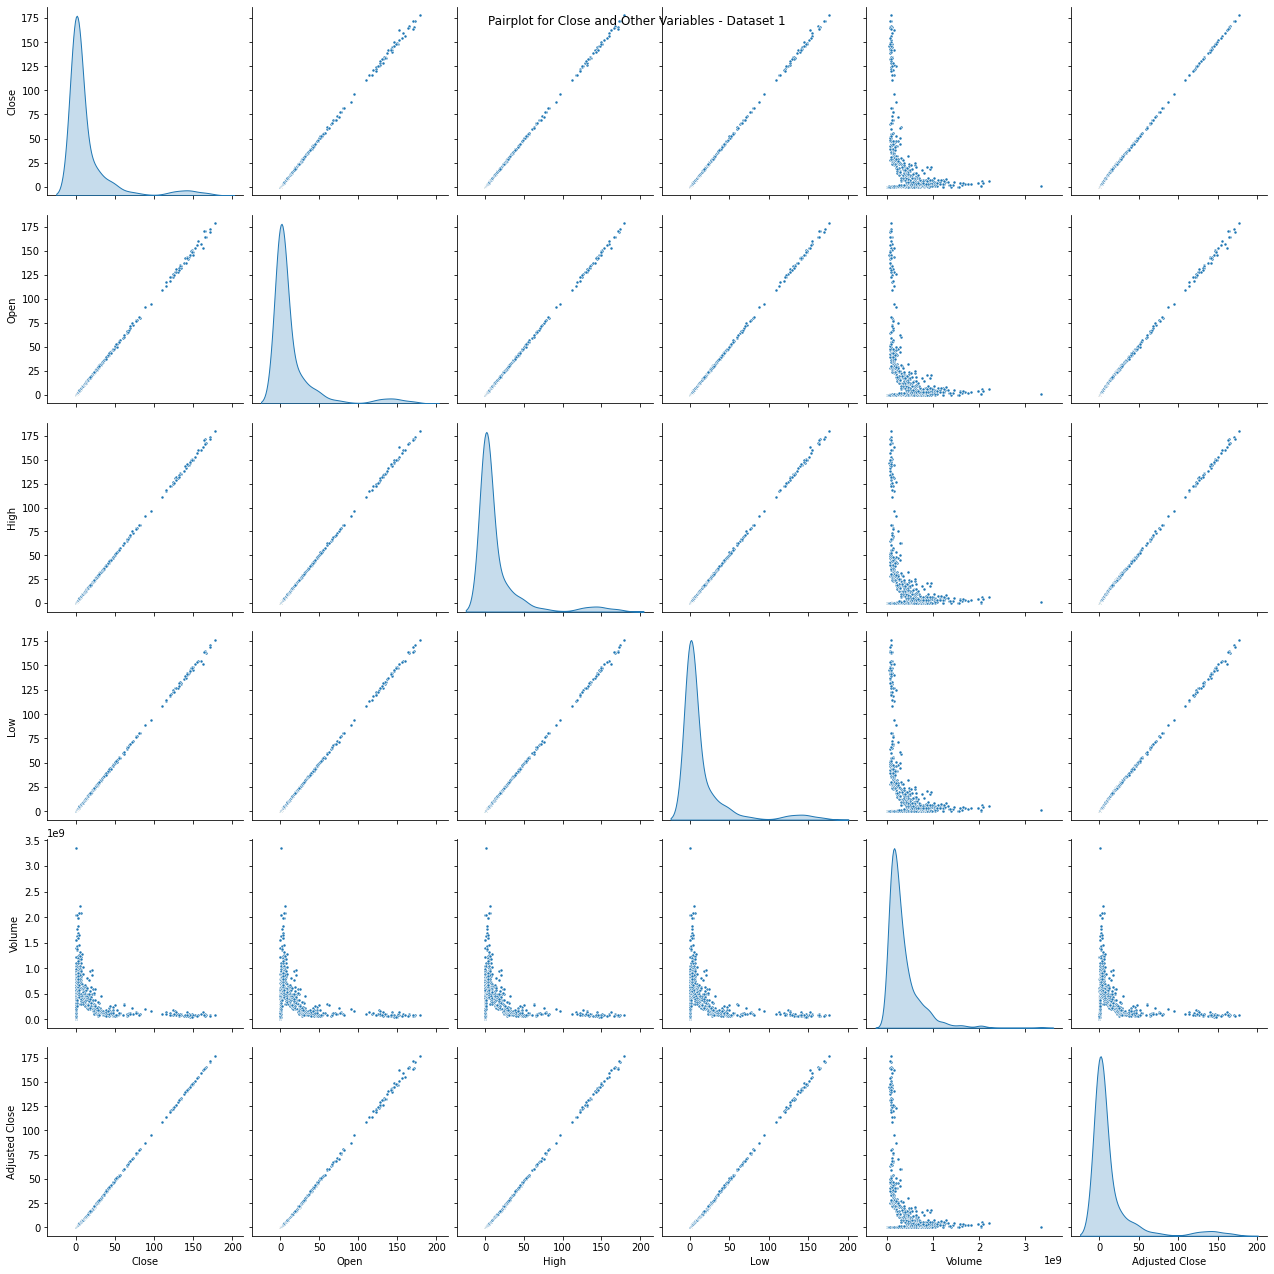

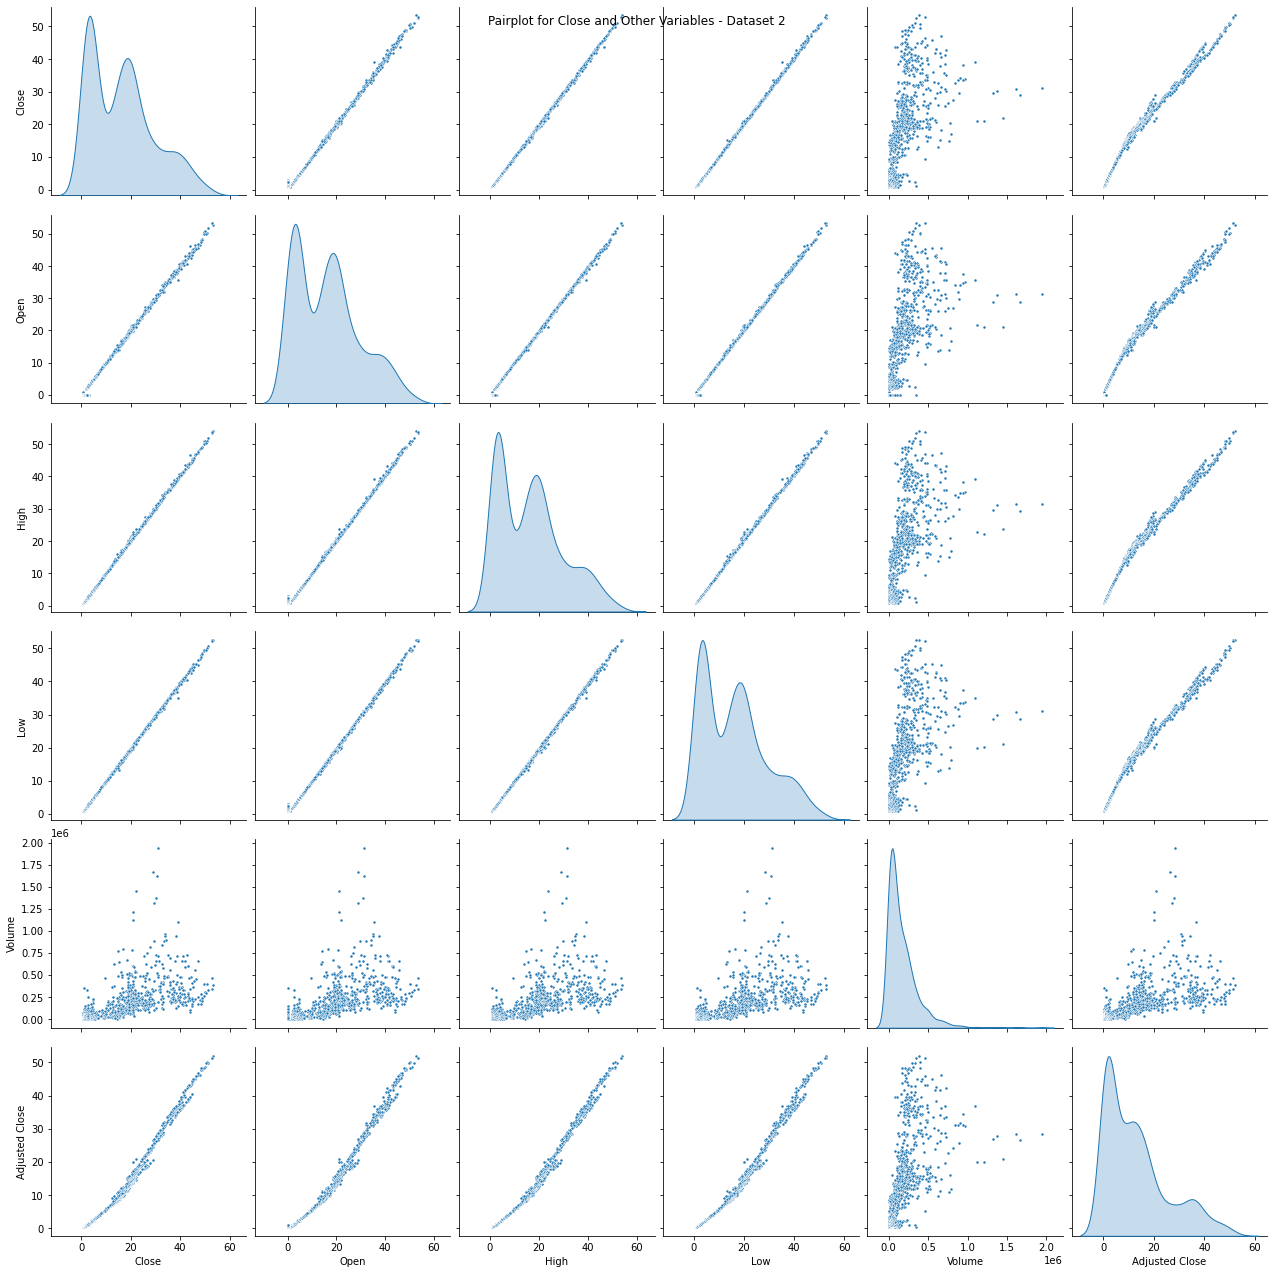

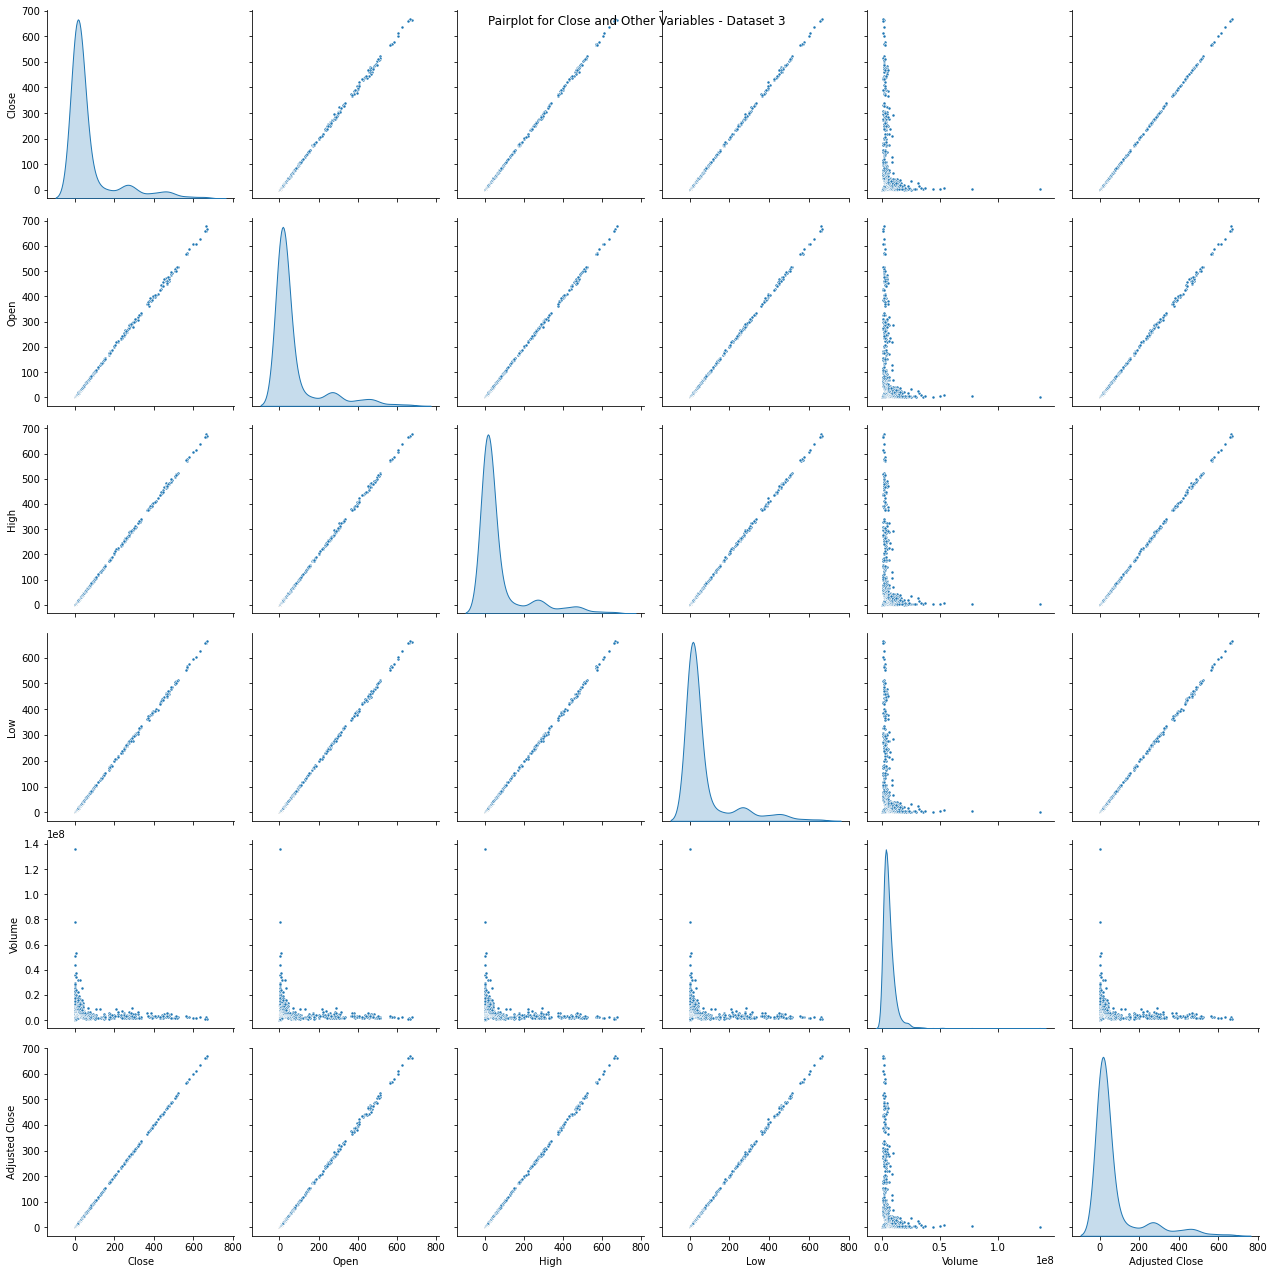

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession, functions as F
def generate_pairplot_for_datasets(*datasets, target_column='Close', numerical_columns=None, sample_size=1000):
    """
    Generate pairplots for the specified target column and numerical columns in multiple PySpark DataFrames.

    Parameters:
    - datasets: Variable number of PySpark DataFrames.
    - target_column: Name of the target column (default is 'Close').
    - numerical_columns: List of numerical columns to include in the pairplot.
                         If None, all numerical columns (excluding the target) will be considered.
    - sample_size: Number of samples to use for pairplot (default is 1000).

    Returns:
    None (displays the pairplots).
    """
    if numerical_columns is None:
        numerical_columns = [col for col, dtype in datasets[0].dtypes if dtype in ('double', 'float') and col != target_column]
    for i, df in enumerate(datasets, 1):
        sampled_data = df.select([target_column] + numerical_columns).sample(False, sample_size / df.count())
        pandas_df = sampled_data.toPandas()
        sns.pairplot(pandas_df, markers='.', diag_kind='kde', height=3)
        plt.suptitle(f'Pairplot for {target_column} and Other Variables - Dataset {i}')
        plt.show()
generate_pairplot_for_datasets(df_apple, df_abm, df_adobe, target_column='Close', numerical_columns=['Open', 'High', 'Low', 'Volume', 'Adjusted Close'])


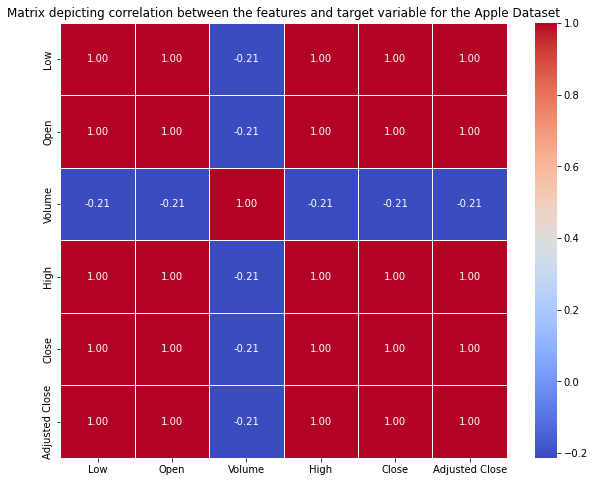

In [0]:
#Correlation Matrix for the apple dataset
selected_features = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
panda_df = df_apple.toPandas()
selected_df=panda_df[selected_features]
matrixOfCorr= selected_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrixOfCorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrix depicting correlation between the features and target variable for the Apple Dataset')
plt.show()

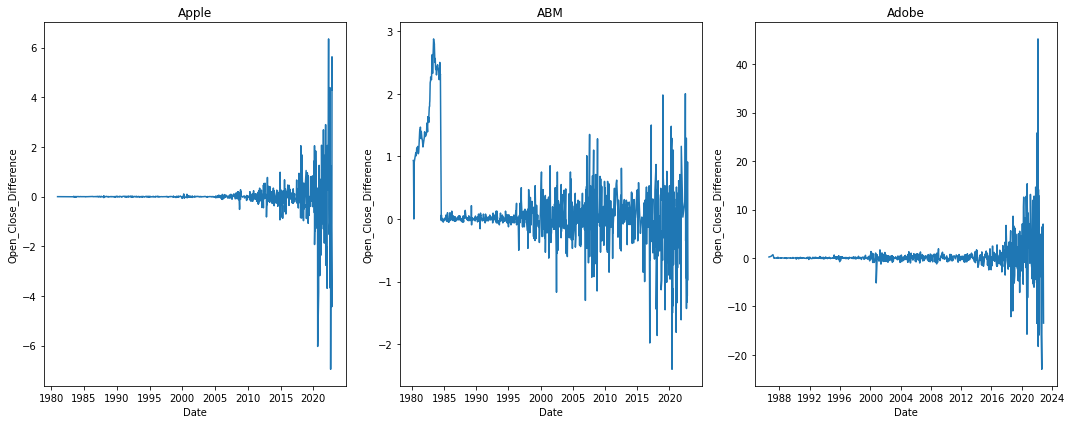

In [0]:
#Plotting the difference between Open and Close price
sampled_data_apple = df_apple.select("Date", "Open", "Close").sample(False, 0.1)
sampled_data_abm = df_abm.select("Date", "Open", "Close").sample(False, 0.1)
sampled_data_adobe = df_adobe.select("Date", "Open", "Close").sample(False, 0.1)
pandas_df_apple = sampled_data_apple.toPandas()
pandas_df_abm = sampled_data_abm.toPandas()
pandas_df_adobe = sampled_data_adobe.toPandas()
pandas_df_apple['Open_Close_Difference'] = pandas_df_apple['Close'] - pandas_df_apple['Open']
pandas_df_abm['Open_Close_Difference'] = pandas_df_abm['Close'] - pandas_df_abm['Open']
pandas_df_adobe['Open_Close_Difference'] = pandas_df_adobe['Close'] - pandas_df_adobe['Open']
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.lineplot(x='Date', y='Open_Close_Difference', data=pandas_df_apple)
plt.title('Apple')
plt.subplot(1, 3, 2)
sns.lineplot(x='Date', y='Open_Close_Difference', data=pandas_df_abm)
plt.title('ABM')
plt.subplot(1, 3, 3)
sns.lineplot(x='Date', y='Open_Close_Difference', data=pandas_df_adobe)
plt.title('Adobe')
plt.tight_layout()
plt.show()

In [0]:
from pyspark.sql.functions import year, avg
def plot_price_difference(df, stock_name):
    df = df.withColumn("Year", year(df["Date"]))
    avg_price_diff = df.groupBy("Year").agg(avg(df["Close"] - df["Open"]).alias("AvgPriceDifference"))
    pandas_df = avg_price_diff.toPandas()
    plt.bar(pandas_df["Year"], pandas_df["AvgPriceDifference"])
    plt.xlabel('Year')
    plt.ylabel('Average Price Difference (Close - Open)')
    plt.title(f'Average Price Difference Over the Years - {stock_name}')
    plt.show()

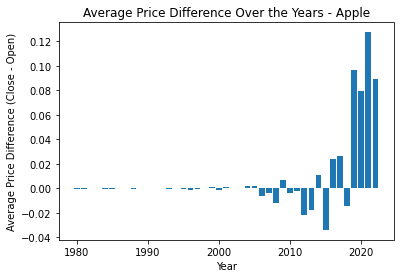

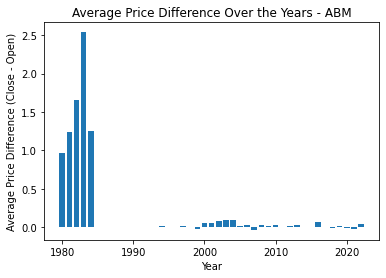

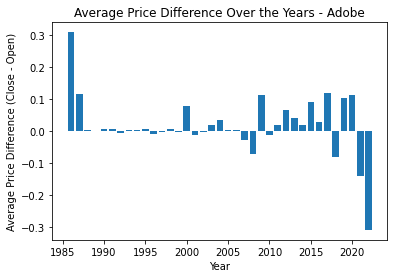

In [0]:
plot_price_difference(df_apple, "Apple")
plot_price_difference(df_abm, "ABM")
plot_price_difference(df_adobe, "Adobe")

In [0]:
from sklearn.preprocessing import MinMaxScaler
pandas_df_apple = df_apple.toPandas()
pandas_df_abm = df_abm.toPandas()
pandas_df_adobe = df_adobe.toPandas()
columns_to_scale = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
scaler = MinMaxScaler()
for col in columns_to_scale:
    pandas_df_apple[col + '_scaled'] = scaler.fit_transform(pandas_df_apple[[col]])
    pandas_df_abm[col + '_scaled'] = scaler.fit_transform(pandas_df_abm[[col]])
    pandas_df_adobe[col + '_scaled'] = scaler.fit_transform(pandas_df_adobe[[col]])
X_apple = pandas_df_apple[[col + '_scaled' for col in columns_to_scale if col != 'Close']].to_numpy()
X_abm = pandas_df_abm[[col + '_scaled' for col in columns_to_scale if col != 'Close']].to_numpy()
X_adobe = pandas_df_adobe[[col + '_scaled' for col in columns_to_scale if col != 'Close']].to_numpy()
Y_apple = pandas_df_apple['Close_scaled'].to_numpy()
Y_abm = pandas_df_abm['Close_scaled'].to_numpy()
Y_adobe = pandas_df_adobe['Close_scaled'].to_numpy()
features = ['Low_scaled', 'Open_scaled', 'volume_scaled', 'High_scaled', 'Adjusted Close_scaled']

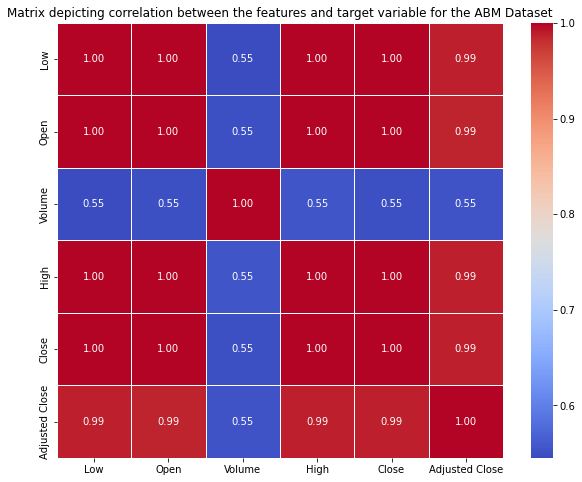

In [0]:
#Plotting correlation matrix for the ABM dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
selected_df = pandas_df_abm[selected_features]
matrixOfCorr = selected_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrixOfCorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrix depicting correlation between the features and target variable for the ABM Dataset')
plt.show()

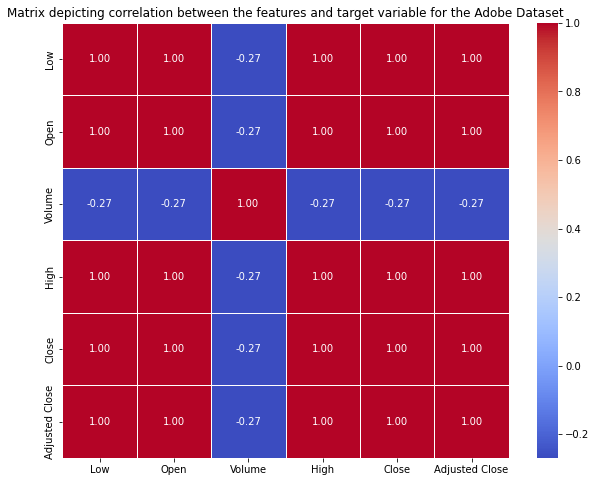

In [0]:
#Plotting the correlation matrix for Adobe Dataset
selected_features = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
selected_df = pandas_df_adobe[selected_features]
matrixOfCorr = selected_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrixOfCorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrix depicting correlation between the features and target variable for the Adobe Dataset')
plt.show()

In [0]:

xAppleTrain, xAppleTest, yAppleTrain, yAppleTest = train_test_split(X_apple, Y_apple, test_size=0.2, random_state=42)
xAbmTrain, xAbmTest, yAbmTrain, yAbmTest = train_test_split(X_abm, Y_abm, test_size=0.2, random_state=42)
xAdobeTrain, xAdobeTest, yAdobeTrain, yAdobeTest = train_test_split(X_adobe, Y_adobe, test_size=0.2, random_state=42)

print("Apple Train Dataset Shape:", xAppleTrain.shape, yAppleTrain.shape)
print("ABM Train Dataset Shape:", xAbmTrain.shape, yAbmTrain.shape)
print("Adobe Train Dataset Shape:", xAdobeTrain.shape, yAdobeTrain.shape)

print("Apple Test Dataset Shape:", xAppleTest.shape, yAppleTest.shape)
print("ABM Test Dataset Shape:", xAbmTest.shape, yAbmTest.shape)
print("Adobe Test Dataset Shape:", xAdobeTest.shape, yAdobeTest.shape)

Apple Train Dataset Shape: (8472, 5) (8472,)
ABM Train Dataset Shape: (8622, 5) (8622,)
Adobe Train Dataset Shape: (7326, 5) (7326,)
Apple Test Dataset Shape: (2118, 5) (2118,)
ABM Test Dataset Shape: (2156, 5) (2156,)
Adobe Test Dataset Shape: (1832, 5) (1832,)


In [0]:
# We will be using the Xavier initialization for weights
import numpy as np
class LSTM:
    def __init__(self, inpDim, numOfNeurons, outDim, lr):
        self.inpDim = inpDim
        self.numOfNeurons = numOfNeurons
        self.outDim = outDim
        self.lr = lr

        # Xavier/Glorot initialization for weights
        self.W_forget = np.random.randn(numOfNeurons, inpDim + numOfNeurons) / np.sqrt(inpDim + numOfNeurons)
        self.b_forget = np.zeros(numOfNeurons)

        self.W_input = np.random.randn(numOfNeurons, inpDim + numOfNeurons) / np.sqrt(inpDim + numOfNeurons)
        self.b_input = np.zeros(numOfNeurons)

        self.W_output = np.random.randn(numOfNeurons, numOfNeurons) / np.sqrt(numOfNeurons)
        self.b_output = np.zeros(outDim)

        # Initialize cell state and hidden state
        self.c_state = np.zeros(numOfNeurons)
        self.h_state = np.zeros(numOfNeurons)

        # Intermediate variables for backpropagation
        self.f_gate = None
        self.i_gate = None
        self.c_tilde = None
        self.o_gate = None

        # Gradients
        self.d_W_forget = None
        self.d_W_input = None
        self.d_W_output = None

    def sigmoidActivationFunction(self, x):
        return 1 / (1 + np.exp(-x))

    def tanhActivationFunction(self, x):
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

    def forward(self, x):
        # Forget gate
        self.f_gate = self.sigmoidActivationFunction(np.dot(self.W_forget, np.concatenate([x, self.h_state])) + self.b_forget)

        # Input gate
        self.i_gate = self.sigmoidActivationFunction(np.dot(self.W_input, np.concatenate([x, self.h_state])) + self.b_input)

        # Cell state update
        self.c_tilde = self.tanhActivationFunction(np.dot(self.W_input, np.concatenate([x, self.h_state])) + self.b_input)
        self.c_state = self.f_gate * self.c_state + self.i_gate * self.c_tilde

        # Output gate
        self.o_gate = self.sigmoidActivationFunction(np.dot(self.W_output, self.c_state) + self.b_output)
        self.h_state = self.o_gate * self.tanhActivationFunction(self.c_state)

        return self.h_state

    def backward(self, x, y):
        """
        Performs backward propagation through the LSTM network.

        Args:
            x: The input data.
            y: The target output.

        Returns:
            gradients 
        """
        # Calculate binary cross-entropy loss gradient
        loss_grad = self.h_state - y.flatten()

        # Output gate gradient
        dh_state = loss_grad * self.o_gate * (1 - np.square(np.tanh(self.c_state)))

        # Cell state gradient
        dc_state = dh_state * self.o_gate * (1 - np.square(np.tanh(self.c_state))) + loss_grad * self.f_gate * np.tanh(self.c_state)

        # Input, Forget, and Cell State Update Gradients
        di_gate = dc_state * np.tanh(self.c_tilde)
        df_gate = dc_state * self.c_state
        dc_tilde = dc_state * self.i_gate

        # Backpropagation through Gates
        df_gate = df_gate * self.f_gate * (1 - self.f_gate)
        di_gate = di_gate * self.i_gate * (1 - self.i_gate)
        dc_tilde = dc_tilde * (1 - np.square(np.tanh(self.c_tilde)))

        self.d_W_forget = np.outer(df_gate, np.concatenate([x, self.h_state]))
        self.d_W_input = np.outer(di_gate, np.concatenate([x, self.h_state]))
        self.d_W_output = np.outer(dh_state, self.c_state).reshape((self.c_state.shape[0], self.numOfNeurons))

        return self.d_W_forget, self.d_W_input, self.d_W_output

    def updateWgts(self):
        self.W_forget -= self.lr * self.d_W_forget
        self.W_input -= self.lr * self.d_W_input
        self.W_output -= self.lr * self.d_W_output.T

    def meanSqError(yTrue, yPred):
        return np.mean(np.square(yTrue - yPred))
    
    def fit_lstm(model, X_train, y_train, num_epochs, lr):
        """

        Args:
            model
            X_train: array
            y_train: array
            num_epochs: Number of training epochs.
            lr: Learning rate.

        Returns:
            List of mean squared errors for each epoch.
        """
        mse_history = []

        for ep in range(num_epochs):
            epochLoss = 0.0

            for i in range(len(X_train)):
                x = X_train[i]
                y = y_train[i]

                # Forward pass
                output = model.forward(x)

                # Backward pass
                model.backward(x, y)

                # Update weights
                model.updateWgts()

                # Calculate mean squared error 
                epochLoss += LSTM.meanSqError(y, output)

            #  Calculating RMSE
            mse = epochLoss / len(X_train)
            rmse=np.sqrt(mse)
            mse_history.append(rmse)

            
            print(f"Epoch {ep + 1}/{num_epochs}, Training RMSE: {rmse}")

        return mse_history
    
    def predict(self, X):
        """
        Predicts the output for input data X.

        Args:
            X: array
        Returns:
            Predicted output.
        """
        predictions = []

        for x in X:
            output = self.forward(x)
            predictions.append(output)

        return np.array(predictions)

In [0]:
def plot_epochs_rmse(mse_vals):
   epochsList = list(range(1, len(mse_vals) + 1))
   plt.figure(figsize=(16,8))
   plt.plot(epochsList, mse_vals, marker='o', linestyle='-')
   plt.title('RMSE Values vs. Number of epochs')
   plt.xlabel('Epochs')
   plt.ylabel('RMSE')
   plt.grid(True)
   plt.xticks(range(2, len(epochsList) + 2, 2))
   plt.show()

In [0]:
def calculate_rmse(true_values, predictions):
    """
    Calculate Root Mean Squared Error (RMSE) for each output separately.

    Args:
        true_values: Actual values.
        predictions: Predicted values.

    Returns:
        List of RMSE values
    """
    rmseVals = []
    for i in range(predictions.shape[1]):
        mse = np.mean((true_values - predictions[:, i])**2)
        rmse = np.sqrt(mse)
        rmseVals.append(rmse)
    return rmseVals

def calculate_r2(true_values, predictions):
    """
    Calculate R-squared (R2) score for each output separately.

    Args:
        true_values: Actual values.
        predictions: Predicted values.

    Returns:
        List of R-squared scores.
    """
    r2Vals = []
    for i in range(predictions.shape[1]):
        mean_true = np.mean(true_values)
        totalSumofSq = np.sum((true_values - mean_true)**2)
        residualSumofSq = np.sum((true_values - predictions[:, i])**2)
        r2 = 1 - (residualSumofSq / totalSumofSq)
        r2Vals.append(r2)
    return r2Vals

In [0]:
#For apple dataset
inpDim = len(features)
outDim = 1 
numOfNeurons = 10
no_epochs=50
lstm_model_apple = LSTM(inpDim=inpDim, numOfNeurons=numOfNeurons, outDim=outDim, lr=0.03)
mse_history_apple = LSTM.fit_lstm(lstm_model_apple, xAppleTrain, yAppleTrain, num_epochs=no_epochs, lr=0.03)

Epoch 1/50, Training RMSE: 0.19963821038528956
Epoch 2/50, Training RMSE: 0.21357517158007885
Epoch 3/50, Training RMSE: 0.2502596693995148
Epoch 4/50, Training RMSE: 0.24612770174226503
Epoch 5/50, Training RMSE: 0.23774110240861648
Epoch 6/50, Training RMSE: 0.23596416549087995
Epoch 7/50, Training RMSE: 0.23211858851606584
Epoch 8/50, Training RMSE: 0.22229395107156577
Epoch 9/50, Training RMSE: 0.21697459331190233
Epoch 10/50, Training RMSE: 0.21685763030297317
Epoch 11/50, Training RMSE: 0.21815078685019756
Epoch 12/50, Training RMSE: 0.22138692468292084
Epoch 13/50, Training RMSE: 0.2284218031775506
Epoch 14/50, Training RMSE: 0.2310528564605443
Epoch 15/50, Training RMSE: 0.22775763992771744


<command-3383835064523958>:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 16/50, Training RMSE: 0.22888151038018212
Epoch 17/50, Training RMSE: 0.2238261477738768
Epoch 18/50, Training RMSE: 0.22412356231182726
Epoch 19/50, Training RMSE: 0.22431071823104046
Epoch 20/50, Training RMSE: 0.2238478612822827
Epoch 21/50, Training RMSE: 0.22650012410503956
Epoch 22/50, Training RMSE: 0.23030619804578498
Epoch 23/50, Training RMSE: 0.23154256931662565
Epoch 24/50, Training RMSE: 0.2355441311771651
Epoch 25/50, Training RMSE: 0.2445039981749559
Epoch 26/50, Training RMSE: 0.24832470336838677
Epoch 27/50, Training RMSE: 0.2516506280283713
Epoch 28/50, Training RMSE: 0.2487480137705682
Epoch 29/50, Training RMSE: 0.2549881936649365
Epoch 30/50, Training RMSE: 0.2538659240405549
Epoch 31/50, Training RMSE: 0.26801116578961043
Epoch 32/50, Training RMSE: 0.25399345918755356
Epoch 33/50, Training RMSE: 0.22300153832451458
Epoch 34/50, Training RMSE: 0.21987563860777715
Epoch 35/50, Training RMSE: 0.22071787581085456
Epoch 36/50, Training RMSE: 0.22145920797649635


In [0]:
#testing on Apple dataset
predictions_apple = lstm_model_apple.predict(xAppleTest)

<command-3383835064523958>:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [0]:
#Calculating RMSE and R2 score for Apple
rmse_apple = calculate_rmse(yAppleTest, predictions_apple)
print(f"RMSE value: {rmse_apple}")
r2_apple = calculate_r2(yAppleTest, predictions_apple)
print(f"R-2 Score: {r2_apple}")
avg_rmse_apple = np.mean(rmse_apple)
avg_r2_apple = np.mean(r2_apple)
print("--"*100)
print(f"Root Mean Squared Error (RMSE) for Test set: {avg_rmse_apple}")
print(f" R-2 Score for Test set: {avg_r2_apple}")

RMSE value: [0.22587180896157252, 0.21403857539259524, 0.1941129059227698, 0.20459746683950594, 0.21460422702143048, 0.22773612855989833, 0.23550445875323447, 0.2613368776746014, 0.3442789639234396, 0.22841790232472298]
R-2 Score: [-0.47661433781192986, -0.3259499290272856, -0.09056572245271521, -0.21155609183930868, -0.33296751268540037, -0.5010905399692691, -0.6052448632498806, -0.9767166350473862, -2.430551912422902, -0.5100916241452509]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error (RMSE) for Test set: 0.23504993153737708
 R-2 Score for Test set: -0.6461349168651329


In [0]:
#For ABM dataset
inpDim = len(features)  
outDim = 1  
numOfNeurons = 10
no_epochs=50
lstm_model_abm = LSTM(inpDim=inpDim, numOfNeurons=numOfNeurons, outDim=outDim, lr=0.05)
mse_history_abm = LSTM.fit_lstm(lstm_model_abm, xAbmTrain, yAbmTrain, num_epochs=no_epochs, lr=0.05)

<command-3383835064523958>:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 1/50, Training RMSE: 0.32170307651389146
Epoch 2/50, Training RMSE: 0.3008848364540131
Epoch 3/50, Training RMSE: 0.31449882207184915
Epoch 4/50, Training RMSE: 0.33450211902757104
Epoch 5/50, Training RMSE: 0.33269466950995547
Epoch 6/50, Training RMSE: 0.33203810630768377
Epoch 7/50, Training RMSE: 0.3283127182729834
Epoch 8/50, Training RMSE: 0.31450361810170435
Epoch 9/50, Training RMSE: 0.30885668044618375
Epoch 10/50, Training RMSE: 0.308443457061622
Epoch 11/50, Training RMSE: 0.33859525631023824
Epoch 12/50, Training RMSE: 0.3487284866963797
Epoch 13/50, Training RMSE: 0.3603944036304512
Epoch 14/50, Training RMSE: 0.33929971956240185
Epoch 15/50, Training RMSE: 0.32924564321686217
Epoch 16/50, Training RMSE: 0.3270166922371026
Epoch 17/50, Training RMSE: 0.31308547387072017
Epoch 18/50, Training RMSE: 0.3183237505329279
Epoch 19/50, Training RMSE: 0.31578058564735345
Epoch 20/50, Training RMSE: 0.3133250629523689
Epoch 21/50, Training RMSE: 0.31308526797048686
Epoch 22/5

In [0]:
predictions_abm = lstm_model_abm.predict(xAbmTest)
type(predictions_abm)

<command-3383835064523958>:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Out[43]: numpy.ndarray

In [0]:
#Calculating RMSE and R2 score for ABM dataset
rmse_abm = calculate_rmse(yAbmTest, predictions_abm)
print(f"RMSE value): {rmse_abm}")
r2_abm = calculate_r2(yAbmTest, predictions_abm)
print(f"R-2 Score: {r2_abm}")
avg_rmse_abm = np.mean(rmse_abm)
avg_r2_abm = np.mean(r2_abm)
print("--"*100)
print(f"Root Mean Squared Error (RMSE) for Test set: {avg_rmse_abm}")
print(f"R-2 Score for Test set: {avg_r2_abm}")

RMSE value): [0.3135066191339311, 0.3160399718482047, 0.31517074844142157, 0.31411988351873876, 0.3153789590921251, 0.31496138429530884, 0.39321949181926485, 0.31573505482608805, 0.3061013036218801, 0.31357068024842466]
R-2 Score: [-0.5548510272806071, -0.5800811226587927, -0.5714014942117105, -0.5609400048431445, -0.5734784039644689, -0.5693144613261829, -1.4460505666746624, -0.5770336523701638, -0.4822645224455382, -0.5554865205056987]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error (RMSE) for Test set: 0.3217804096845388
R-2 Score for Test set: -0.647090177628097


In [0]:
# For Adobe Dataset
inpDim = len(features)  
outDim = 1  
your_num_neurons = 10
no_epochs=50
lstm_model_adobe = LSTM(inpDim=inpDim, numOfNeurons=numOfNeurons, outDim=outDim, lr=0.05)
mse_history_adobe = LSTM.fit_lstm(lstm_model_adobe, xAdobeTrain, yAdobeTrain, num_epochs=no_epochs, lr=0.05)

Epoch 1/50, Training RMSE: 0.2625002407690942
Epoch 2/50, Training RMSE: 0.25755589720902033
Epoch 3/50, Training RMSE: 0.22832264002292246
Epoch 4/50, Training RMSE: 0.22803557643895878
Epoch 5/50, Training RMSE: 0.230233453941353


<command-3383835064523958>:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 6/50, Training RMSE: 0.23450059889825647
Epoch 7/50, Training RMSE: 0.24374845746247353
Epoch 8/50, Training RMSE: 0.24412093058224793
Epoch 9/50, Training RMSE: 0.2415875983965596
Epoch 10/50, Training RMSE: 0.2407866237443418
Epoch 11/50, Training RMSE: 0.23997727165164745
Epoch 12/50, Training RMSE: 0.23967899387687874
Epoch 13/50, Training RMSE: 0.23938731879646905
Epoch 14/50, Training RMSE: 0.23901109298038078
Epoch 15/50, Training RMSE: 0.23884703379021727
Epoch 16/50, Training RMSE: 0.23875981735932036
Epoch 17/50, Training RMSE: 0.23873280081776496
Epoch 18/50, Training RMSE: 0.2386076778611068
Epoch 19/50, Training RMSE: 0.2385711320764692
Epoch 20/50, Training RMSE: 0.23865736565988444
Epoch 21/50, Training RMSE: 0.238562844842452
Epoch 22/50, Training RMSE: 0.23840735148697004
Epoch 23/50, Training RMSE: 0.23832508548124948
Epoch 24/50, Training RMSE: 0.23824746253970705
Epoch 25/50, Training RMSE: 0.2381676237182371
Epoch 26/50, Training RMSE: 0.23809795780542575
Epo

In [0]:
predictions_adobe = lstm_model_adobe.predict(xAdobeTest)
type(predictions_adobe)

<command-3383835064523958>:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Out[46]: numpy.ndarray

In [0]:
rmse_adobe = calculate_rmse(yAdobeTest, predictions_adobe)
print(f"RMSE value: {rmse_adobe}")
r2_adobe = calculate_r2(yAdobeTest, predictions_adobe)
print(f"R-2 Score: {r2_adobe}")
avg_rmse_adobe = np.mean(rmse_adobe)
avg_r2_adobe = np.mean(r2_adobe)
print("--"*100)
print(f"Root Mean Squared Error (RMSE) for Test set: {avg_rmse_adobe}")
print(f" R-2 Score for Test set: {avg_r2_adobe}")

RMSE value: [0.2492646575314535, 0.21974311615307066, 0.21974315905156225, 0.21974267269233477, 0.24957586210284827, 0.2197431592143148, 0.24923059531170685, 0.24934662122735562, 0.2197431592143148, 0.24969304303145706]
R-2 Score: [-0.672287324325209, -0.2996309477290775, -0.29963145515987866, -0.2996257021976134, -0.6764656008370957, -0.29963145708502026, -0.671830316685657, -0.6733872747663621, -0.29963145708502026, -0.6780402396087524]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error (RMSE) for Test set: 0.23458260455304186
 R-2 Score for Test set: -0.4870161775479686


Plotting RMSE for each epoch -- Apple Dataset


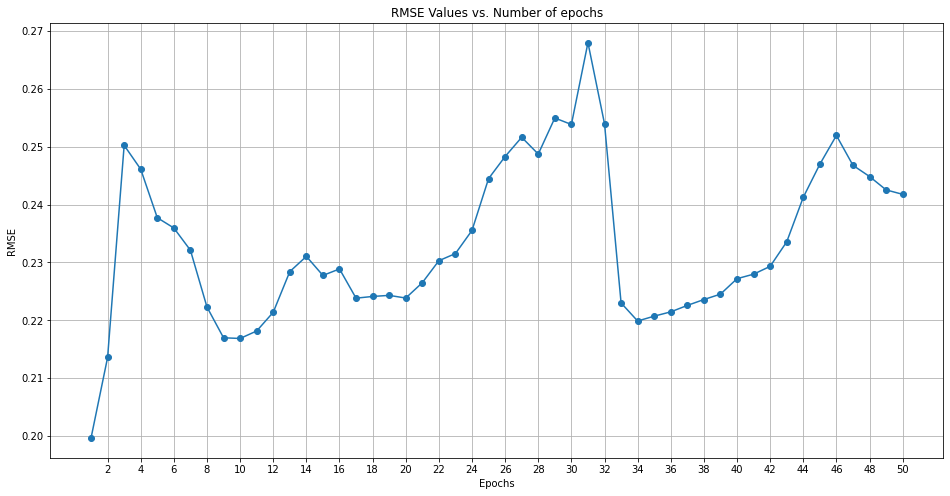

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Plotting RMSE for each epoch -- ABM Dataset


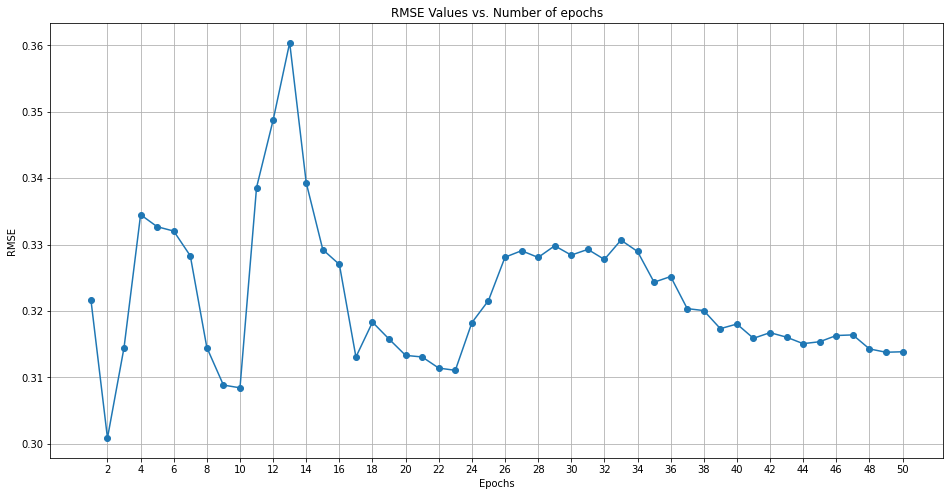

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Plotting RMSE for each epoch -- Adobe Dataset


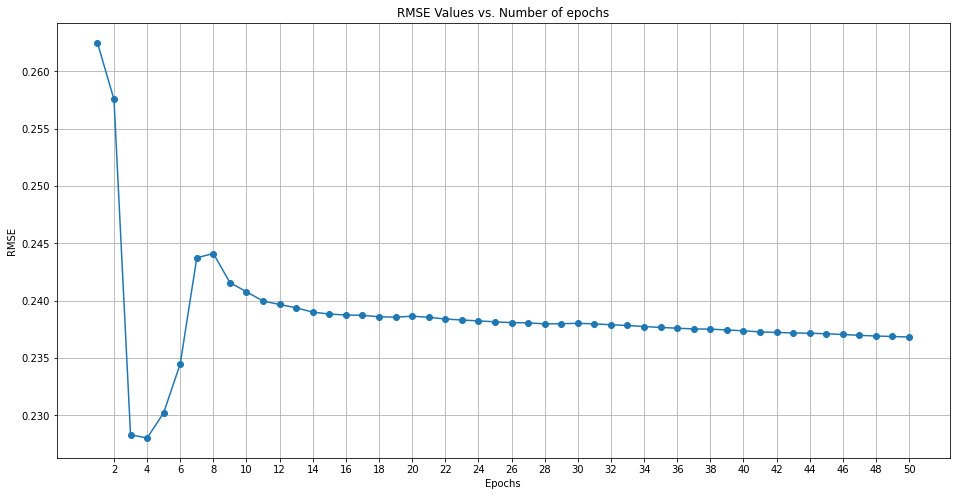

In [0]:
print("Plotting RMSE for each epoch -- Apple Dataset")
plot_epochs_rmse(mse_history_apple)
print("--"*100)
print("Plotting RMSE for each epoch -- ABM Dataset")
plot_epochs_rmse(mse_history_abm)
print("--"*100)
print("Plotting RMSE for each epoch -- Adobe Dataset")
plot_epochs_rmse(mse_history_adobe)